-----Reading XML

In [1]:
import xml.etree.ElementTree as ET

In [2]:
tree = ET.parse(r'C:\Users\cid2r\Downloads\db\discogs_20220201_masters.xml')
#tree = ET.parse('rel.xml')
root = tree.getroot()

----Data Scraping

In [3]:
pip install python3-discogs-client

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
import discogs_client

d = discogs_client.Client('ExampleApplication/0.1', user_token = 'WkcTWMWNFmwUFYHrtQIreHRnLmyFZTNnkflNHsgc')


In [4]:
import os
import urllib.request
from ast import literal_eval

def makedirs(path):
    try:
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise


macos_dir = "/Users/cooky/Documents/GitHub/0220dbtest/img/"
win_dir = r"D:\AlbumCover"


In [5]:
#0310추가
import requests
import shutil
#0312추가
import requests
from bs4 import BeautifulSoup
import json



for release in root.iter('master'):
    id = release.attrib.get('id')
    
    if int(id) > 121238:


        master_scarp = 'https://www.discogs.com/master/' + str(id)
        soup = BeautifulSoup(requests.get(master_scarp).text)
        rslt = soup.find('script', attrs={'id':'master_schema'})
        if rslt == None:
            continue
        else:
            json_file = json.loads(rslt.get_text())
            rating = json_file['@graph'][0]['aggregateRating']['ratingCount']
            
        standard = 1000 if 'Electronic' in literal_eval(str(json_file['@graph'][0]['genre'])) \
            else 500 if ('Rock' in literal_eval(str(json_file['@graph'][0]['genre']))) else 150
    
        if rating >= standard:
            
            print(id)
    
            gens=[]
            for gen in release.iter('genre'):
               gens.append(gen.text)
    
            imglnk = d.master(id).images
            if(imglnk != None):
                if('uri150' in imglnk[0]):
                    uri = imglnk[0]['uri150']
    
        
            if len(gens) == 1:
                if gens[0] == 'Funk / Soul':
                    gens[0] = 'Funk&Soul'
                makedirs(win_dir+gens[0])
                img_name = id + '.jpeg'
                img_dir = os.path.join(win_dir, ('Funk&Soul' if gens[0] == 'Funk / Soul' else gens[0]), img_name)
                #0310add
                makedirs(os.path.join(win_dir, gens[0]))
                r = requests.get(uri, stream=True, headers={'User Agent' : 'Mozilla/5.0'})
                if r.status_code == 200:
                    with open(img_dir, 'wb') as f:
                        r.raw.decode_content = True
                        shutil.copyfileobj(r.raw, f)
        
            else:
                multi_dir = ''
                separator = '+'
                for idx, val in enumerate(gens):
                    multi_dir += ('Funk&Soul' if val == 'Funk / Soul' else val) + ('' if idx == len(gens) -1 else separator)
                img_name = id + '.jpeg'
                img_dir = os.path.join(win_dir, 'multi', multi_dir, img_name)
            
                makedirs(os.path.join(win_dir, 'multi',multi_dir))
                r = requests.get(uri, stream=True, headers={'User Agent' : 'Mozilla/5.0'})
                if r.status_code == 200:
                    with open(img_dir, 'wb') as f:
                        r.raw.decode_content = True
                        shutil.copyfileobj(r.raw, f)
            
            

    
        if(int(id) >= 149999):
            break

print("done! done!")



113651
113655
113656
113669
113671
113674
113703
113707
113708
113715
113718
113785
113798
113803
113841
113848
113851
113887
113910
113932
113995
114001
114034
114059
114209
114223
114252
114256
114258
114267
114276
114303
114425
114454
114474
114479
114491
114546
114553
114582
114585
114616
114632
114659
114662
114664
114665
114667
114670
114672
114691
114692
114693
114695
114696
114702
114705
114707
114719
114724
114755
114774
114786
114791
114816
114817
114829
114831
114833
114836
114878
114981
115059
115062
115075
115076
115128
115168
115240
115251
115268
115277
115278
115320
115322
115328
115332
115333
115340
115398
115415
115417
115426
115525
115530
115536
115539
115552
115572
115610
115612
115669
115674
115688
115693
115755
115813
115842
115882
115897
115914
115919
115923
115927
115931
115933
115937
115978
115981
116037
116154
116364
116449
116450
116475
116476
116522
116539
116548
116551
116556
116563
116628
116637
116650
116687
116709
116714
116728
116795
116800
116807
116812

KeyboardInterrupt: 

-----현재 안쓰는 코드

In [ ]:
'''
import os

#win
#db_list = os.listdir(r"C:\Users\cid2r\Documents\!VSCode\0220dbtest\data")

#mac
db_list = os.listdir(r"/Users/cooky/Documents/GitHub/0220dbtest/data")
'''

In [ ]:
'''
import pandas as pd


alldata = []

for file in db_list:
    df = pd.read_csv(file)
    alldata.append(df)

df_0_2_100k = pd.concat(alldata, axis=0, ignore_index=True)
df_0_2_100k.to_csv("/Users/cooky/Documents/GitHub/0220dbtest/data/output", index=False)

'''


In [ ]:
df_0_2_100k = pd.read_csv("data_20k_2_25k.csv")

df_test = df_0_2_100k.copy()
df_test.drop(columns='Unnamed: 0')

In [ ]:
from ast import literal_eval


for idx,row in df_test.iterrows():
    gen_str = row['genre']
    gens = literal_eval(gen_str)
    #print(idx)
    for gen in gens:
        if gen in df_test.columns:
            df_test.at[idx, gen] = 1
        else:
            df_test[gen] = 0
            df_test.at[idx, gen] = 1

            

            

In [ ]:
pd.crosstab(df_test.Jazz, df_test.Electronic)

In [ ]:
DISCOGS_KEY = 'OKxXReJmUJvMJRRsaOqr'
DISCOGS_SECRET = 'RormADbxpiujDCXDiBDwFGUFxKrVjkTK'

----실험실

In [1]:
import torch

torch.cuda.is_available()

True

In [ ]:
#win
#pip install fastai

#mac
! conda install -c fastai fastai

In [7]:

macos_dir = "/Users/cooky/Documents/GitHub/0220dbtest/img/"
win_dir = r"D:\AlbumCover"

BATCH_SIZE = 64
IMG_HEI = 150
IMG_WID = 150

In [3]:
import pathlib

dat_dir = pathlib.Path(win_dir)
cnt = len(list(dat_dir.glob('*/*.jpeg')))
print(cnt)

6343


In [4]:
import tensorflow as tf
import numpy as np
import os
import PIL
import PIL.Image




In [5]:
print(tf.__version__)

2.8.0


In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dat_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(IMG_HEI, IMG_WID),
    batch_size=BATCH_SIZE
)

Found 6343 files belonging to 14 classes.
Using 5075 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dat_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEI, IMG_WID),
  batch_size=BATCH_SIZE)

Found 6343 files belonging to 14 classes.
Using 1268 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Blues', 'Classical', 'Electronic', 'Folk, World, & Country', 'Funk&Soul', 'Hip Hop', 'Jazz', 'Latin', 'Non-Music', 'Pop', 'Reggae', 'Rock', 'Stage & Screen', 'models']


In [125]:
print(list(train_ds))

[(<tf.Tensor: shape=(64, 150, 150, 3), dtype=float32, numpy=
array([[[[4.40000000e+01, 3.20000000e+01, 2.00000000e+01],
         [4.20000000e+01, 3.00000000e+01, 1.80000000e+01],
         [3.90000000e+01, 2.70000000e+01, 1.50000000e+01],
         ...,
         [6.80000000e+01, 4.60000000e+01, 2.50000000e+01],
         [6.80000000e+01, 4.50000000e+01, 2.90000000e+01],
         [7.20000000e+01, 4.90000000e+01, 3.50000000e+01]],

        [[4.30099983e+01, 3.10100002e+01, 1.90100002e+01],
         [4.00200005e+01, 2.80200005e+01, 1.60200005e+01],
         [3.60299988e+01, 2.40300007e+01, 1.20299997e+01],
         ...,
         [7.39400024e+01, 4.89700012e+01, 2.69799995e+01],
         [7.29499969e+01, 4.69799995e+01, 2.99899998e+01],
         [7.29899979e+01, 4.70200005e+01, 3.20299988e+01]],

        [[4.10333328e+01, 2.90333328e+01, 1.70333328e+01],
         [3.70499992e+01, 2.50499992e+01, 1.30500002e+01],
         [3.30499992e+01, 2.10499992e+01, 9.05000019e+00],
         ...,
        

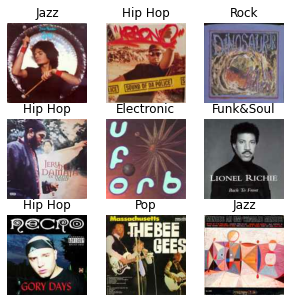

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [12]:
for image_batch, label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(64, 150, 150, 3)
(64,)


In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
from tensorflow.keras import layers

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8941177


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [62]:
num_classes = 14

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEI, IMG_WID, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [53]:
epochs =10

with tf.device("/device:GPU:0"):
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
    )

Epoch 1/10
80/80 [==============================] - 2s 25ms/step - loss: 1.3684 - accuracy: 0.6365 - val_loss: 1.2582 - val_accuracy: 0.6522
Epoch 2/10
80/80 [==============================] - 2s 23ms/step - loss: 1.2652 - accuracy: 0.6432 - val_loss: 1.2551 - val_accuracy: 0.6546
Epoch 3/10
80/80 [==============================] - 2s 22ms/step - loss: 1.2209 - accuracy: 0.6461 - val_loss: 1.2758 - val_accuracy: 0.6601
Epoch 4/10
80/80 [==============================] - 2s 23ms/step - loss: 1.1257 - accuracy: 0.6564 - val_loss: 1.2737 - val_accuracy: 0.6522
Epoch 5/10
80/80 [==============================] - 2s 22ms/step - loss: 1.0029 - accuracy: 0.6833 - val_loss: 1.3848 - val_accuracy: 0.6601
Epoch 6/10
80/80 [==============================] - 2s 21ms/step - loss: 0.8358 - accuracy: 0.7263 - val_loss: 1.4385 - val_accuracy: 0.5946
Epoch 7/10
80/80 [==============================] - 2s 22ms/step - loss: 0.6344 - accuracy: 0.7939 - val_loss: 1.6449 - val_accuracy: 0.5868
Epoch 8/10
80

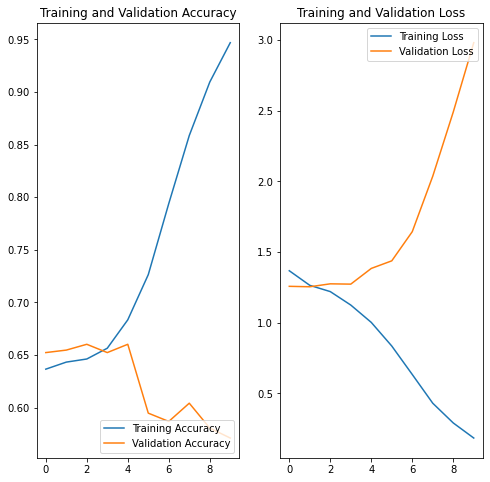

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(IMG_HEI, 
                                                              IMG_WID,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [65]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
epochs = 7

with tf.device("/device:GPU:0"):
    history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/7
80/80 [==============================] - 2s 23ms/step - loss: 0.0813 - accuracy: 0.9756 - val_loss: 4.4433 - val_accuracy: 0.5812
Epoch 2/7
80/80 [==============================] - 2s 22ms/step - loss: 0.0711 - accuracy: 0.9791 - val_loss: 4.7279 - val_accuracy: 0.5962
Epoch 3/7
80/80 [==============================] - 2s 23ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 4.7537 - val_accuracy: 0.5781
Epoch 4/7
80/80 [==============================] - 2s 22ms/step - loss: 0.0554 - accuracy: 0.9856 - val_loss: 4.7654 - val_accuracy: 0.5757
Epoch 5/7
80/80 [==============================] - 2s 23ms/step - loss: 0.0437 - accuracy: 0.9870 - val_loss: 5.5021 - val_accuracy: 0.5907
Epoch 6/7
80/80 [==============================] - 2s 22ms/step - loss: 0.0537 - accuracy: 0.9854 - val_loss: 4.9433 - val_accuracy: 0.5820
Epoch 7/7
80/80 [==============================] - 2s 23ms/step - loss: 0.0461 - accuracy: 0.9864 - val_loss: 5.0909 - val_accuracy: 0.5402


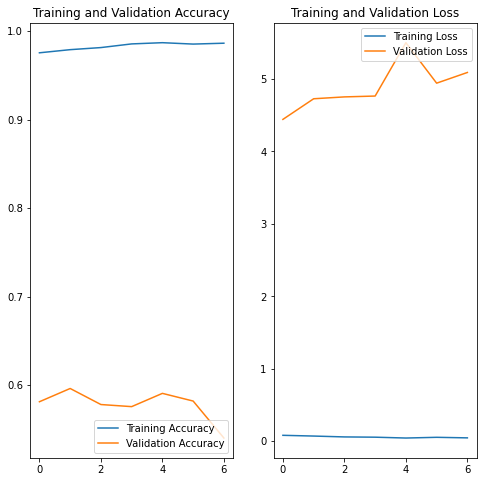

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [70]:
prob = tf.keras.Sequential([model,
                            tf.keras.layers.Softmax()])

pred = prob.predict(val_ds)

In [74]:
class_names[np.argmax(pred[0])]



'Rock'

In [75]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

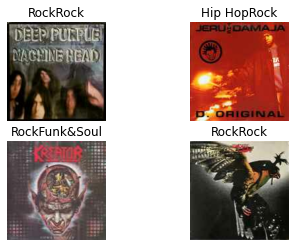

In [116]:
for images, labels in train_ds.take(1):
    for i in range(4):
        ax=plt.subplot(2,2,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]] + class_names[np.argmax(pred[i])]
)
        plt.axis('off')


In [119]:
def plot_confusion_matrix(cm, class_names):
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [122]:
from datetime import datetime
import io
import itertools
from packaging import version

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics


# Clear out prior logging data.
#!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

In [ ]:
def log_confusion_matrix(epoch, logs):
      # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(test_images)
  test_pred = np.argmax(test_pred_raw, axis=1)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [4]:
from fastai.vision.all import *

data = ImageDataLoaders.from_folder(path=macos_dir, valid_pct=0.2, seed=42, item_tfms=RandomResizedCrop(128, min_scale=0.35))

ModuleNotFoundError: No module named 'fastai.vision.all'

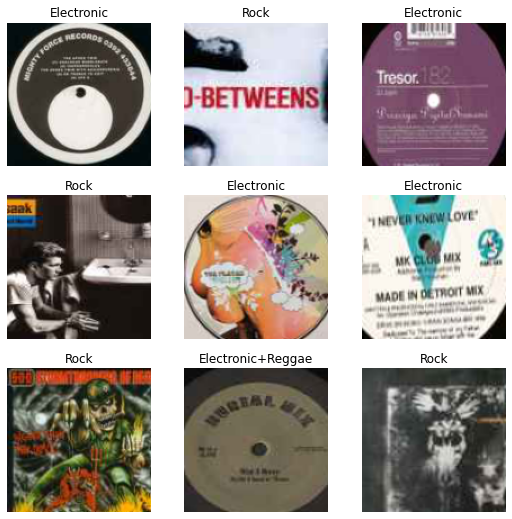

In [6]:
data.show_batch()

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

SuggestedLRs(valley=0.001737800776027143)

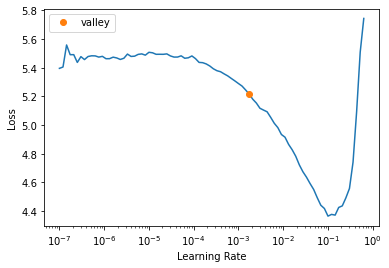

In [8]:
learn.lr_find()
#learn.recorder.plot()

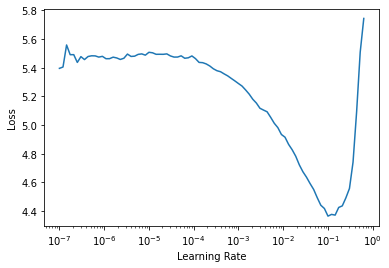

In [10]:
learn.recorder.plot_lr_find()

In [ ]:
lr = 1e-3
learn.fit_one_cycle(3, slice(lr))